In [1]:
thresh = 0.9374

In [2]:
from tensorflow.keras.callbacks import Callback
class myCallback(Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > thresh):   
            self.model.stop_training = True

In [3]:
callbacks = myCallback()

In [4]:
import pandas as pd
import numpy as np


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import tensorflow as tf
tf.random.set_seed(0)

In [5]:
train = pd.read_csv('/Users/kshitijaupasham/Desktop/fashion-mnist_train.csv')

In [6]:
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
train.shape

(60000, 785)

In [8]:
y = train.loc[:,'label'] 
X = train.iloc[:,1:]

In [9]:
print(X.shape)
print(y.shape)

(60000, 784)
(60000,)


In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0,test_size=0.05)

In [11]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(57000, 784)
(57000,)
(3000, 784)
(3000,)


In [12]:
y_test = pd.get_dummies(y_test)
y_train = pd.get_dummies(y_train)

In [13]:
X_train = X_train/255
X_test = X_test/255

In [14]:
X_train = X_train.values.reshape(-1,28,28,1)
X_test = X_test.values.reshape(-1,28,28,1)

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_batch =datagen.flow(X_train,y_train,batch_size=64)

In [16]:
steps_per_epoch = int(X_train.shape[0]/64)

In [17]:
model = Sequential()

model.add(Conv2D(28,kernel_size=(3,3),activation='relu',input_shape=(28,28,1),padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(56, kernel_size = (3,3),activation ='relu',padding='same', kernel_initializer='he_uniform'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(256, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dense(128, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dense(64, activation = "relu", kernel_initializer='he_uniform'))
model.add(Dropout(0.1))
model.add(Dense(10, activation = "softmax"))

In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 28)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 56)        14168     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 56)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 56)          0         
_________________________________________________________________
flatten (Flatten)            (None, 2744)              0

In [20]:
history = model.fit(train_batch,steps_per_epoch = steps_per_epoch, validation_data=(X_test, y_test), epochs=30,callbacks=[callbacks])

Epoch 1/30
890/890 [==============================] - 55s 62ms/step - loss: 0.6612 - accuracy: 0.7515 - val_loss: 0.3986 - val_accuracy: 0.8563
Epoch 2/30
890/890 [==============================] - 55s 62ms/step - loss: 0.4574 - accuracy: 0.8295 - val_loss: 0.3100 - val_accuracy: 0.8867
Epoch 3/30
890/890 [==============================] - 54s 61ms/step - loss: 0.3991 - accuracy: 0.8523 - val_loss: 0.3180 - val_accuracy: 0.8827
Epoch 4/30
890/890 [==============================] - 56s 63ms/step - loss: 0.3657 - accuracy: 0.8647 - val_loss: 0.3011 - val_accuracy: 0.8900
Epoch 5/30
890/890 [==============================] - 57s 64ms/step - loss: 0.3401 - accuracy: 0.8744 - val_loss: 0.2888 - val_accuracy: 0.8870
Epoch 6/30
890/890 [==============================] - 56s 63ms/step - loss: 0.3256 - accuracy: 0.8797 - val_loss: 0.2799 - val_accuracy: 0.8907
Epoch 7/30
890/890 [==============================] - 58s 65ms/step - loss: 0.3126 - accuracy: 0.8849 - val_loss: 0.2601 - val_accuracy:

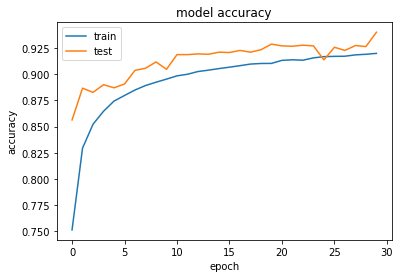

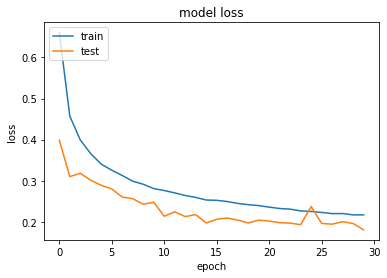

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [23]:
94.00

94.0